In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Charger les données
file_path = 'dataset_modele_ia_2021.csv'
data = pd.read_csv(file_path)

In [4]:
# Nettoyage des données
cols_to_convert = ['Cambriolages de logement', 'Trafic de stupéfiants', 'Vols avec armes']
for col in cols_to_convert:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Calcul du nombre de lignes nécessaires pour chaque classe
total_samples = len(data)
target_samples_class_1 = int(0.6 * total_samples)
target_samples_class_2 = total_samples - target_samples_class_1

# Échantillonnage de la classe 1 pour atteindre 60% du total
candidat_1_data = data[data['Candidat_Max_Voix_T1_2022_Encoded'] == 1]
candidat_2_data = data[data['Candidat_Max_Voix_T1_2022_Encoded'] == 2]
candidat_0_data = data[data['Candidat_Max_Voix_T1_2022_Encoded'] == 0]

# Sous-échantillonnage pour avoir exactement 60% de candidat 1
if len(candidat_1_data) > target_samples_class_1:
    candidat_1_data = candidat_1_data.sample(target_samples_class_1, random_state=42)
else:
    duplication_factor = (target_samples_class_1 // len(candidat_1_data)) - 1
    candidat_1_data = pd.concat([candidat_1_data] * duplication_factor, axis=0).sample(target_samples_class_1, random_state=42)

# Combinaison des données de classe 1 et des autres classes
balanced_data = pd.concat([candidat_1_data, candidat_2_data, candidat_0_data], axis=0).reset_index(drop=True)

# Recalculer les features et la cible avec les données équilibrées
X_balanced = balanced_data.drop(columns=['Libelle_Commune', 'Code_Commune', 'Candidat_Max_Voix_T1_2022_Encoded', 'Nombre_Voix_Max_T1_2022'])
y_balanced = balanced_data['Candidat_Max_Voix_T1_2022_Encoded']

In [5]:
# Division des données en ensembles d'entraînement et de test
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Construction et entraînement du modèle Gradient Boosting avec les données équilibrées
model_balanced = GradientBoostingClassifier(random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Prédiction et évaluation
y_pred_balanced = model_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
report_balanced = classification_report(y_test_balanced, y_pred_balanced)

print(f'Accuracy: {accuracy_balanced:.2f}')
print('Classification Report:')
print(report_balanced)

Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.81      0.81      0.81        27
           2       0.00      0.00      0.00         1

    accuracy                           0.71        35
   macro avg       0.40      0.41      0.40        35
weighted avg       0.70      0.71      0.71        35



C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334

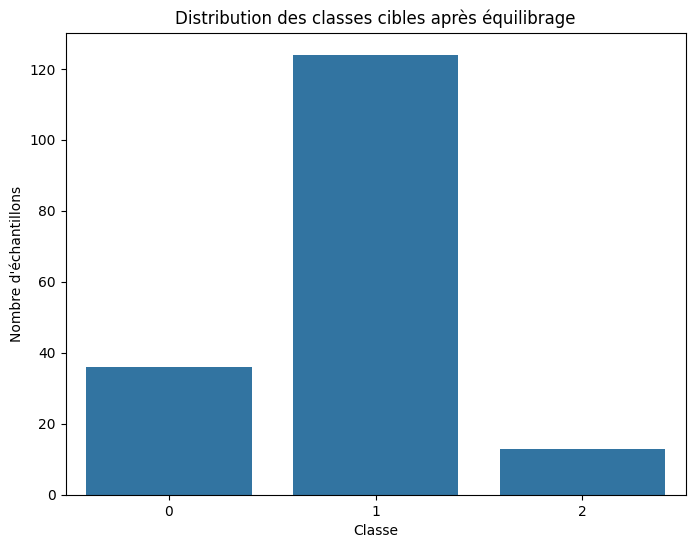

In [6]:
# 1. Distribution des classes cibles après équilibrage
plt.figure(figsize=(8, 6))
sns.countplot(x=y_balanced)
plt.title('Distribution des classes cibles après équilibrage')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'échantillons')
plt.show()


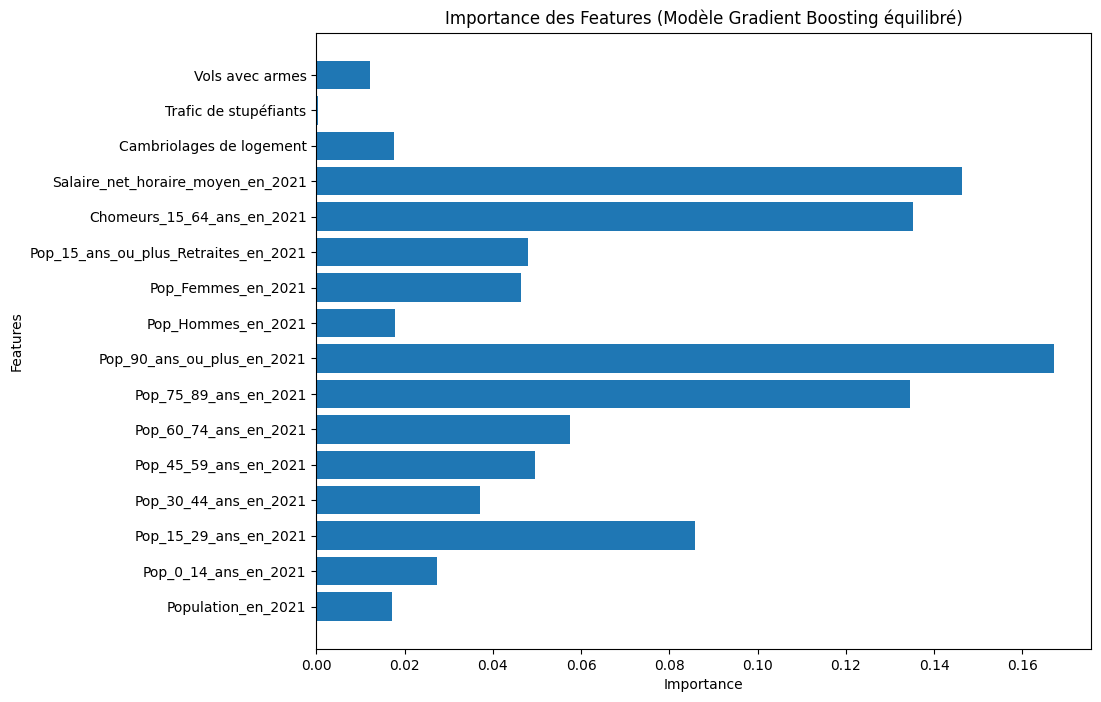

In [7]:
# 2. Importance des features
feature_importances = model_balanced.feature_importances_
features = X_balanced.columns

plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.title('Importance des Features (Modèle Gradient Boosting équilibré)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

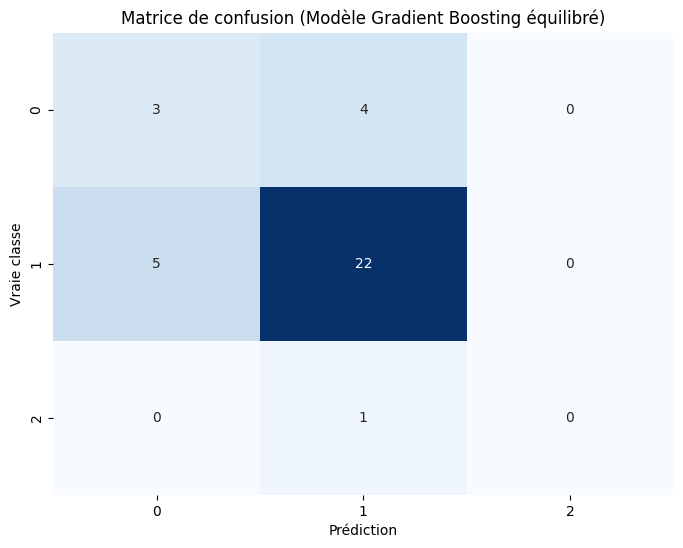

In [8]:
# 3. Matrice de confusion
cm = confusion_matrix(y_test_balanced, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Matrice de confusion (Modèle Gradient Boosting équilibré)')
plt.xlabel('Prédiction')
plt.ylabel('Vraie classe')
plt.show()